# Regression algorithms for predicting stock market price

### Authors:
Iuliana Ilie <br>
Benjamin Vega

## Objective: 
   Examine different regression algorithms to predict future stock prices based on the historical data for 5  companies.

## First step:
Finding a proper dataset and performing data processing and cleaning.

Data was extracted from Yahoo Finance dataset. We selected 5 preferred companies and extracted their historical daily data from 01/01/1990 until 10/11/2020 into different json files.

In [3]:
#!/usr/bin/env python
import requests
import json

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

# Create list of companies we are interested in
names = ['AAPL','GOOG','MSFT','INTC','AMZN']

# For each company extract the historical data from API
for i in names:
    
    url = "https://financialmodelingprep.com"
    search_query_format = "{}/{}&apikey={}"
    key = "c7cf4ab5efb5bcc3d7ba60f6654df7c5"
    url2 = "/api/v3/historical-price-full/"+i+"?from=1990-01-01&to=2020-11-10"
    
    query = search_query_format.format(url, url2, key )
    r = requests.get(query)
        
# Create a json file with the data of each company
    json_string = r.json()
    with open("data_file_"+i+".json", "w") as write_file:
        json.dump(json_string, write_file)
        print("data_file_"+i+".json", "was created")

data_file_AAPL.json was created
data_file_GOOG.json was created
data_file_MSFT.json was created
data_file_INTC.json was created
data_file_AMZN.json was created


**In order to use the data with our Regression algorithm the data from the json files had to be converted to "csv" and "libsvm" formats**

In [4]:
# Convert JSON file to CSV 
   
import json 
import csv 
  
names = ['AAPL','GOOG','MSFT','INTC','AMZN']

# For each company a csv file is created
for i in names:
    
# Opening JSON file and loading the data into the variable data 

    with open('data_file_'+i+'.json') as json_file: 
        data = json.load(json_file) 
  
    company_data = data['historical'] 
  
    # Open a file for writing 
    data_file = open('data_file_'+i+'.csv', 'w') 

    # Create the csv writer object 
    csv_writer = csv.writer(data_file) 

    # Counter variable used for writing  
    # headers to the CSV file 
    count = 0
  
    for company in company_data: 
        if count == 0: 

            # Writing headers of CSV file 
            header = company.keys() 
            csv_writer.writerow(header) 
            count += 1

        # Writing data of CSV file 
        csv_writer.writerow(company.values()) 
    print('data_file_'+i+'.csv', 'was created')
    data_file.close() 

data_file_AAPL.csv was created
data_file_GOOG.csv was created
data_file_MSFT.csv was created
data_file_INTC.csv was created
data_file_AMZN.csv was created


In [15]:
# Convert JSON to LIBSVM
names = ["AAPL","GOOG",'MSFT','INTC',"AMZN"]

for i in names:
    with open("data_file_"+i+".json") as file:
           data = json.load(file)

    with open("data_file_"+i+".txt", "w") as file:
        for item in data['historical']:
            file.write(str(item['close']) + ' 1:' + str(item['high']) + ' 2:'  + str(item['low'])+ ' 3:'  + str(item['open'])+ ' 4:'  + str(item['adjClose'])
                + ' 5:'  + str(item['volume']) + ' 6:'  + str(item['unadjustedVolume']) + ' 7:'  + str(item['change']) + ' 8:'  + str(item['changePercent']) + ' 9:' + str(item['vwap']) 
                + ' 10:'  + str(item['changeOverTime']) +'\n')

# Convert JSON to CSV
    with open("data_file_"+i+".csv", "w") as file:

        header = 'label,high,low,open,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime'
        file.write(header+'\n')
        for item in data['historical']:
            file.write(str(item['close']) + ',' + str(item['high']) + ','  + str(item['low'])+ ','  + str(item['open'])+ ','  + str(item['adjClose'])
                + ','  + str(item['volume']) + ','  + str(item['unadjustedVolume']) + ','  + str(item['change']) + ','  + str(item['changePercent']) + ',' + str(item['vwap']) 
                + ','  + str(item['changeOverTime'])+'\n')

## Data cleaning

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import VectorAssembler

from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

import matplotlib.pyplot as plt

from pyspark.ml.stat import Correlation
import pandas as pd
import seaborn as sns

#Create Spark session        
if __name__ == "__main__":
    spark_session = SparkSession \
        .builder \
        .appName("Spark Regression") \
        .getOrCreate()

    # Loads data in libsvm format
    names = ["AAPL","GOOG"]

    for i in names:
        dataset = spark_session \
            .read \
            .format("libsvm") \
            .load("data_file_"+i+".txt")
        
#Print the number of entries in the dataset                  
print("Number of entries in dataset", dataset.count())

# delete duplicate rows
dataset = dataset.distinct()
#dropping rows that have empty values
dataset = dataset.dropna()
print("Number of entries after cleaning", dataset.count())


### Print the correlation between the features in the dataset using Pearson and Spearman correlation. One difference between them is that the Pearson coefficient works with a linear relationship between the variables whereas the Spearman Coefficient works with monotonic relationships as well.


Number of entries in dataset 4087
Number of entries after cleaning 4087
Pearson correlation matrix:

['open', 'high', 'low', 'adjClose', 'volume', 'unadjustedVolume', 'change', 'changePercent', 'vwap', 'changeOverTime']

[[ 1.          0.99980809  0.99988645  0.99986116 -0.53434297 -0.53434297  0.04295644  0.02270593  0.99994001  0.02270593]
 [ 0.99980809  1.          0.99984995  0.99988409 -0.53838615 -0.53838615  0.0455634   0.02446029  0.99994642  0.02446029]
 [ 0.99988645  0.99984995  1.          0.99974081 -0.5362035  -0.5362035   0.03269288  0.01502211  0.99987549  0.01502211]
 [ 0.99986116  0.99988409  0.99974081  1.         -0.53644699 -0.53644699  0.05543857  0.03185143  0.99996467  0.03185143]
 [-0.53434297 -0.53838615 -0.5362035  -0.53644699  1.          1.         -0.03432045 -0.031814   -0.53640564 -0.031814  ]
 [-0.53434297 -0.53838615 -0.5362035  -0.53644699  1.          1.         -0.03432045 -0.031814   -0.53640564 -0.031814  ]
 [ 0.04295644  0.0455634   0.03269288  0.

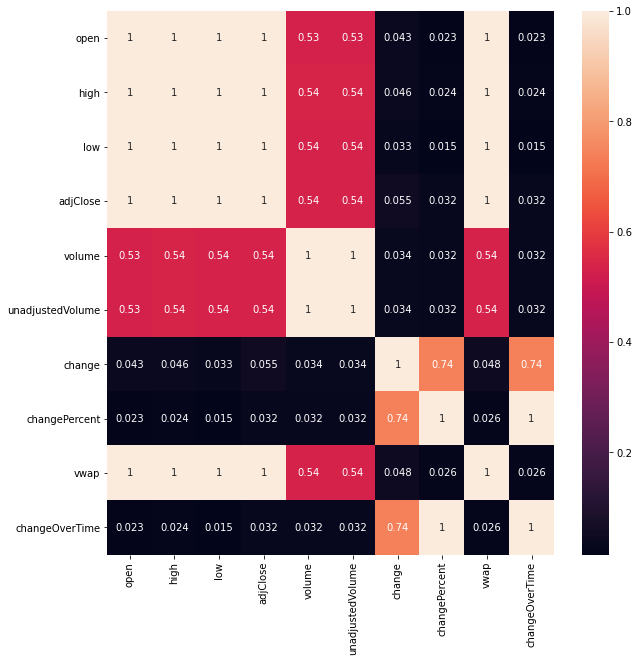

Spearman correlation matrix:



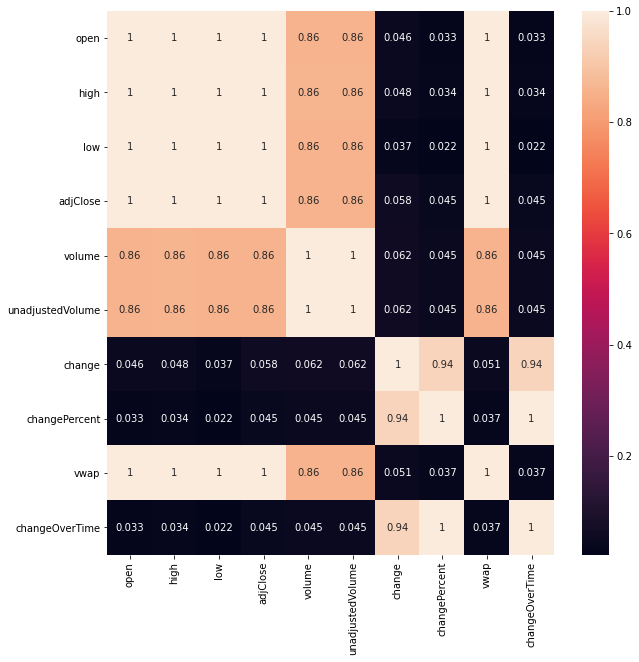

In [2]:
features = dataset.select("features")
np.set_printoptions(linewidth=np.inf)

head_values = [["open","high","low","adjClose","volume","unadjustedVolume","change","changePercent","vwap","changeOverTime"]]

# Correlation for libsvm data
r1 = Correlation.corr(features, "features").head()
print("Pearson correlation matrix:\n" )

matrix = head_values
matrix.append(r1[0].toArray())
#r1.collect()[0]["pearson({})".format("features")].values

for row in matrix:  
    print(row) 
    print() 

###########
df_correlation_matrix = pd.DataFrame(r1[0].toArray(),columns=head_values[0],index=head_values[0])
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_correlation_matrix.abs(), annot = True)
plt.show()
###########

r2 = Correlation.corr(features, "features", "spearman").head()
print("Spearman correlation matrix:\n")# + str(r2[0]))
#spearman_matrix = head_values
##spearman_matrix = r2[0].toArray()

for row in spearman_matrix:  
    print(row) 
    print()
    
###########
df_correlation_matrix_2 = pd.DataFrame(r2[0].toArray(),columns=head_values[0],index=head_values[0])
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_correlation_matrix_2.abs(), annot = True)
plt.show()
###########


In [41]:
df_2 = df_correlation_matrix_2.abs()
df_2 > 0.8

,open,high,low,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime
open,True,False,False,False,True,True,True,False,False,True
high,False,True,True,True,False,False,False,False,False,False
low,False,True,True,True,False,False,False,False,False,False
adjClose,False,True,True,True,False,False,False,False,False,False
volume,True,False,False,False,True,True,True,False,False,True
unadjustedVolume,True,False,False,False,True,True,True,False,False,True
change,True,False,False,False,True,True,True,False,False,True
changePercent,False,False,False,False,False,False,False,True,True,False
vwap,False,False,False,False,False,False,False,True,True,False
changeOverTime,True,False,False,False,True,True,True,False,False,True


## Second step: 
Implementing the regression algorithms

### Implementing Linear Regression and Gradient Boosting algorithms trained on a the processed dataset

In [2]:
    dataset.printSchema()
    dataset.show()

    # Split the data into training and test sets (30% held out for testing)
    (trainingData, testData) = dataset.randomSplit([0.7, 0.3])

    #Create linear regression model
    lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

    # Fit the model
    lrModel = lr.fit(trainingData)

    # Print the coefficients and intercept for linear regression
    print("Coefficients: %s" % str(lrModel.coefficients))
    print("Intercept: %s" % str(lrModel.intercept))

    # Summarize the model over the training set and print out some metrics
    trainingSummary = lrModel.summary
    print("numIterations: %d" % trainingSummary.totalIterations)
    print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
    trainingSummary.residuals.show()
    print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print("r2: %f" % trainingSummary.r2)

    lr_predictions = lrModel.transform(testData)
    lr_predictions.select("prediction", "label", "features").show(5)

    lr_evaluator = RegressionEvaluator(predictionCol="prediction", metricName="r2")
    print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

    print("Using Gradient-boosted tree regression")

    gbt = GBTRegressor(featuresCol='features', labelCol='label', maxIter=10)
    gbt_model = gbt.fit(trainingData)
    gbt_predictions = gbt_model.transform(testData)
    gbt_predictions.select('prediction', 'label', 'features').show(5)
    lr_evaluator = RegressionEvaluator(predictionCol="prediction", metricName="r2")
    print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(gbt_predictions))

    spark_session.stop()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

+---------+--------------------+
|    label|            features|
+---------+--------------------+
|1515.6801|(10,[0,1,2,3,4,5,...|
|  1056.74|(10,[0,1,2,3,4,5,...|
| 442.2175|(10,[0,1,2,3,4,5,...|
| 456.2349|(10,[0,1,2,3,4,5,...|
| 281.5497|(10,[0,1,2,3,4,5,...|
| 272.3143|(10,[0,1,2,3,4,5,...|
| 288.0005|(10,[0,1,2,3,4,5,...|
| 290.4563|(10,[0,1,2,3,4,5,...|
| 150.9741|(10,[0,1,2,3,4,5,...|
| 296.3392|(10,[0,1,2,3,4,5,...|
| 232.0203|(10,[0,1,2,3,4,5,...|
|  183.562|(10,[0,1,2,3,4,5,...|
| 210.8098|(10,[0,1,2,3,4,5,...|
|  149.923|(10,[0,1,2,3,4,5,...|
|  89.7038|(10,[0,1,2,3,4,5,...|
|   917.79|(10,[0,1,2,3,4,5,...|
|   802.32|(10,[0,1,2,3,4,5,...|
|   823.87|(10,[0,1,2,3,4,5,...|
|   606.25|(10,[0,1,2,3,4,5,...|
|    660.9|(10,[0,1,2,3,4,5,...|
+---------+--------------------+
only showing top 20 rows

Coefficients: [0.1982115026931396,0.20142190901744153,0.19997489042902067,0.19986877444071674,0.0,0